# Notebook 02 — Exploração do Dataset **Processado**

**Entrada:** `data/processed/distribuicao-renda-3vars.csv`  
**Objetivo:** análise descritiva das 3 variáveis contínuas (distribuições, boxplots, correlações) para orientar a etapa de modelagem.

Variáveis:
- `rtb_centil` — Rendimentos Tributáveis (soma RTB do centil)
- `imoveis` — Bens e Direitos – Imóveis
- `dividas_onus` — Dívidas e Ônus


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# paths
ROOT = Path.cwd().resolve().parents[0] if Path.cwd().name == "notebooks" else Path.cwd()
DATA_PROCESSED = ROOT / "data" / "processed"
REPORTS_FIGS = ROOT / "reports" / "figures"
REPORTS_FIGS.mkdir(parents=True, exist_ok=True)

INPUT_CSV = DATA_PROCESSED / "distribuicao-renda-3vars.csv"
df = pd.read_csv(INPUT_CSV)

print("CSV:", INPUT_CSV.exists(), INPUT_CSV)
df.head()


CSV: True C:\QuartoSemestre\kmeans-3d-cluster\data\processed\distribuicao-renda-3vars.csv


,rtb_centil,imoveis,dividas_onus
0,1000.0,1938.035,373.73
1,2500.0,1938.035,373.73
2,3700.0,1938.035,373.73
3,4000.0,1938.035,373.73
4,4050.0,1938.035,373.73


## Checagens rápidas

- Dimensão, tipos e nulos  
- Estatísticas descritivas


In [3]:
print("Shape:", df.shape)
print("\nTipos:")
print(df.dtypes)

print("\nNulos por coluna:")
print(df.isna().sum())

print("\nResumo estatístico:")
display(df.describe())

# métricas extras úteis na exploração
extra = df.agg(["median", "skew", "kurt"]).T
extra


Shape: (42913, 3)

Tipos:
rtb_centil      float64
imoveis         float64
dividas_onus    float64
dtype: object

Nulos por coluna:
rtb_centil      0
imoveis         0
dividas_onus    0
dtype: int64

Resumo estatístico:


,rtb_centil,imoveis,dividas_onus
count,42913.000000,42913.000000,42913.000000
mean,57834.639257,547.227608,104.212686
std,50378.005480,682.479764,130.840077
min,0.000000,0.040000,0.000000
25%,22200.000000,55.460000,9.580000
50%,36000.000000,189.470000,36.800000
75%,76697.380000,808.490000,155.240000
max,158443.450000,1938.035000,373.730000


,median,skew,kurt
rtb_centil,36000.00,1.108249,-0.221571
imoveis,189.47,1.194009,-0.148078
dividas_onus,36.80,1.206125,-0.106120


## Distribuições (histogramas)

Verificação visual básica da forma das distribuições.


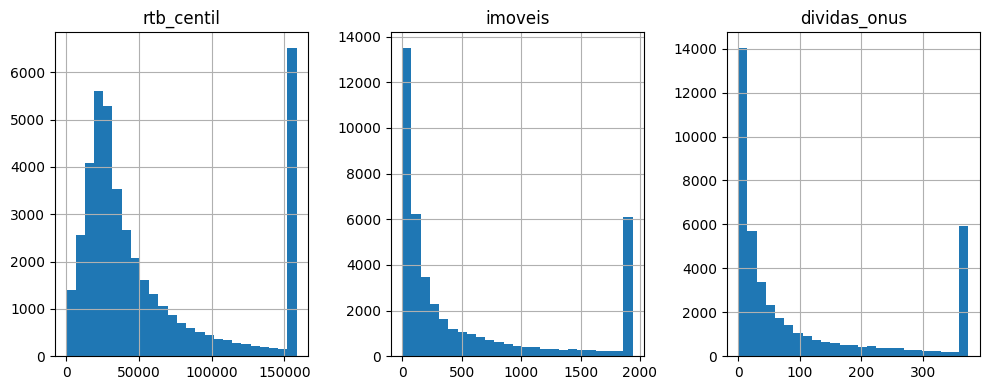

In [4]:
axes = df[["rtb_centil","imoveis","dividas_onus"]].hist(bins=25, figsize=(10,4), layout=(1,3))
plt.tight_layout()
plt.savefig(REPORTS_FIGS / "hist_3vars.png", dpi=120, bbox_inches="tight")
plt.show()


## Boxplots

Inspecionar assimetria e possíveis valores extremos após o tratamento do Notebook 01.


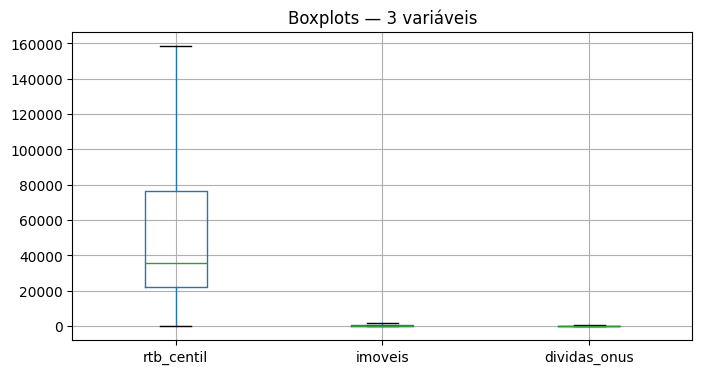

In [5]:
plt.figure(figsize=(8,4))
df[["rtb_centil","imoveis","dividas_onus"]].boxplot()
plt.title("Boxplots — 3 variáveis")
plt.savefig(REPORTS_FIGS / "boxplots_3vars.png", dpi=120, bbox_inches="tight")
plt.show()


## Correlações

Matriz de correlação (Pearson) e *scatter matrix*.


In [6]:
corr = df[["rtb_centil","imoveis","dividas_onus"]].corr(method="pearson")
corr


,rtb_centil,imoveis,dividas_onus
rtb_centil,1.000000,0.235613,0.252543
imoveis,0.235613,1.000000,0.972000
dividas_onus,0.252543,0.972000,1.000000


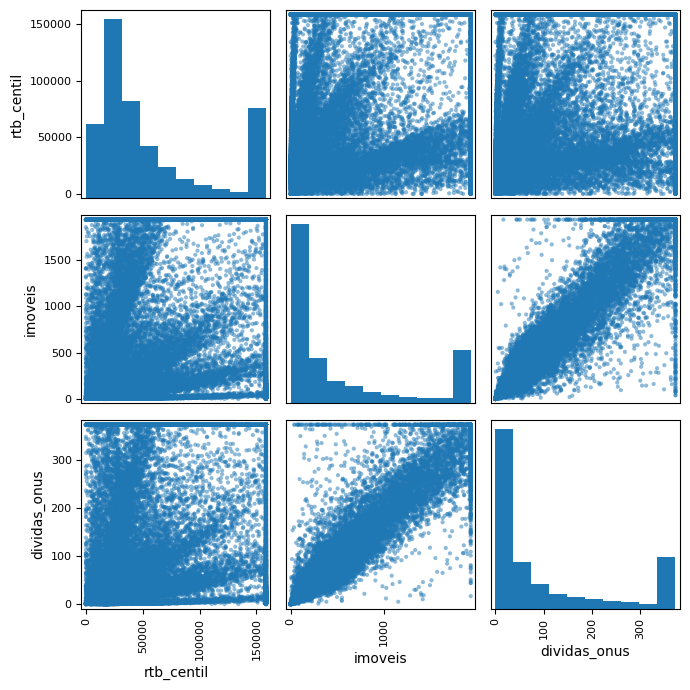

In [7]:
_ = scatter_matrix(df[["rtb_centil","imoveis","dividas_onus"]], figsize=(7,7), diagonal='hist')
plt.tight_layout()
plt.savefig(REPORTS_FIGS / "scatter_matrix_3vars.png", dpi=120, bbox_inches="tight")
plt.show()


## Nota sobre escala/normalização (pré-modelagem)

Para K-Means, é comum padronizar as variáveis (ex.: **StandardScaler**).  
**Não aplicaremos aqui** (somente na fase de modelagem), mas registramos a necessidade.


## Observações iniciais

- **Distribuições:** descreva brevemente o formato (assimetria, cauda longa, etc.).
- **Boxplots:** comentar presença de valores próximos aos limites.
- **Correlação:** registrar correlações mais fortes/fracas e possíveis implicações.


## Artefatos gerados

- `reports/figures/hist_3vars.png`  
- `reports/figures/boxplots_3vars.png`  
- `reports/figures/scatter_matrix_3vars.png`


## Próximos passos

- Criar issue/nota para **recorte temporal** (selecionar 2 anos) — será feita em issue própria.
- Iniciar **Notebook 03 — Modelagem K-Means 3D**:
  - padronização/normalização,
  - escolha de *k* (método do cotovelo/silhouette),
  - *scatter 3D* dos clusters.
